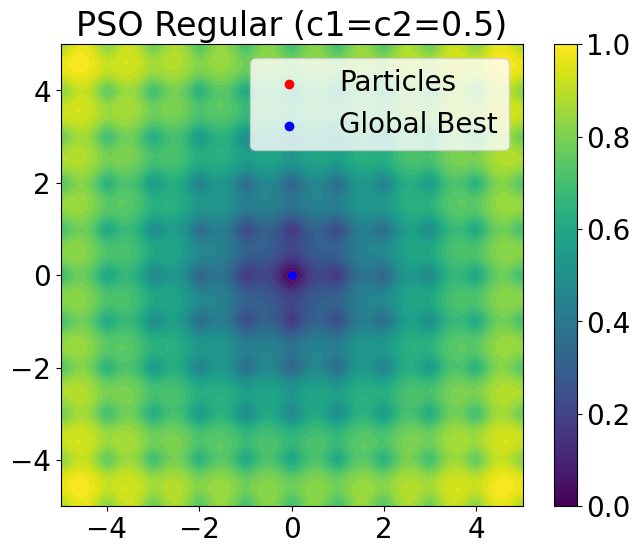

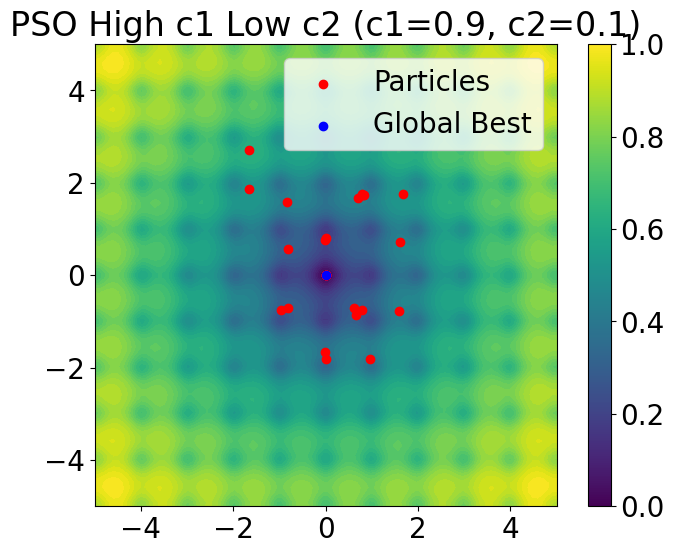

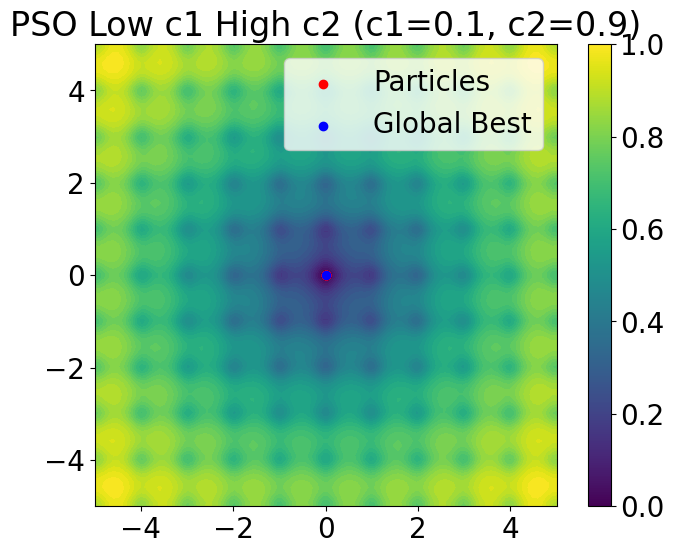

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps

def ackley_function(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[:, 0]**2 + x[:, 1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[:, 0]) + np.cos(2 * np.pi * x[:, 1]))) + np.e + 20

bounds = (np.array([-5, -5]), np.array([5, 5]))

options_regular = {'c1': 0.5, 'c2': 0.5, 'w': 0.5}
options_high_c1 = {'c1': 0.9, 'c2': 0.1, 'w': 0.5}
options_high_c2 = {'c1': 0.1, 'c2': 0.9, 'w': 0.5}

optimizer_regular = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options_regular, bounds=bounds)
optimizer_high_c1 = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options_high_c1, bounds=bounds)
optimizer_high_c2 = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options_high_c2, bounds=bounds)

cost_regular, pos_regular = optimizer_regular.optimize(ackley_function, iters=100, verbose=False)
cost_high_c1, pos_high_c1 = optimizer_high_c1.optimize(ackley_function, iters=100, verbose=False)
cost_high_c2, pos_high_c2 = optimizer_high_c2.optimize(ackley_function, iters=100, verbose=False)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley_function(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

def plot_pso(positions, global_best_position, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.scatter(positions[:, 0], positions[:, 1], color='red', label='Particles')
    plt.scatter(global_best_position[0], global_best_position[1], color='blue', label='Global Best')
    plt.title(title)
    plt.legend()
    plt.colorbar()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

#plot results for each configuration
plot_pso(optimizer_regular.swarm.position, pos_regular, 'PSO Regular (c1=c2=0.5)')
plot_pso(optimizer_high_c1.swarm.position, pos_high_c1, 'PSO High c1 Low c2 (c1=0.9, c2=0.1)')
plot_pso(optimizer_high_c2.swarm.position, pos_high_c2, 'PSO Low c1 High c2 (c1=0.1, c2=0.9)')


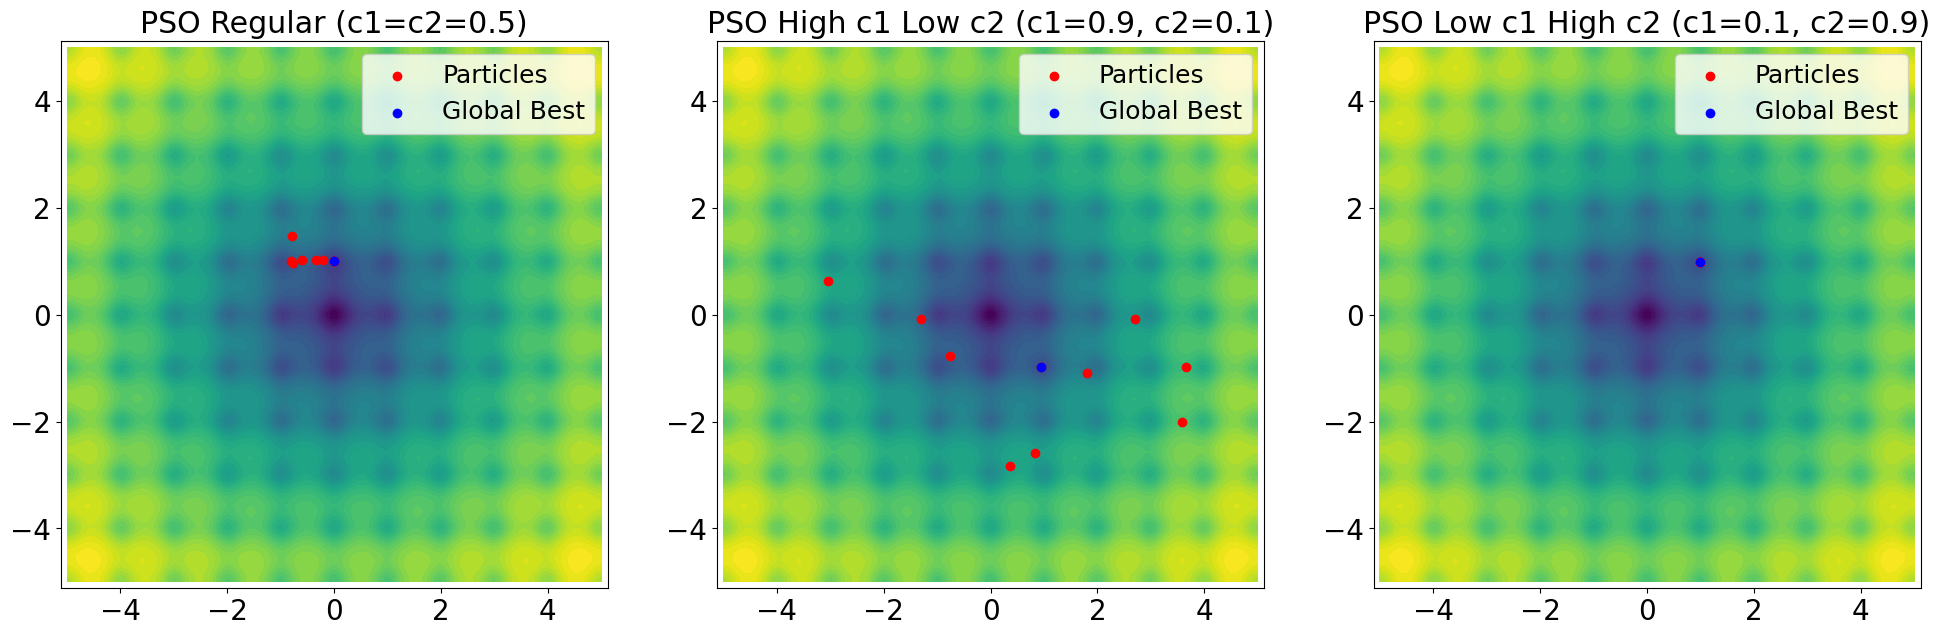

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps

def rastrigin_function(x):
    n = x.shape[1]
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=1)

bounds = (np.array([-5, -5]), np.array([5, 5]))

options_regular = {'c1': 0.5, 'c2': 0.5, 'w': 0.5}
options_high_c1 = {'c1': 0.9, 'c2': 0.1, 'w': 0.5}
options_high_c2 = {'c1': 0.1, 'c2': 0.9, 'w': 0.5}

optimizer_regular = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options_regular, bounds=bounds)
optimizer_high_c1 = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options_high_c1, bounds=bounds)
optimizer_high_c2 = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options_high_c2, bounds=bounds)

cost_regular, pos_regular = optimizer_regular.optimize(rastrigin_function, iters=30, verbose=False)
cost_high_c1, pos_high_c1 = optimizer_high_c1.optimize(rastrigin_function, iters=30, verbose=False)
cost_high_c2, pos_high_c2 = optimizer_high_c2.optimize(rastrigin_function, iters=30, verbose=False)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley_function(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

def plot_pso(ax, positions, global_best_position, title):
    ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.scatter(positions[:, 0], positions[:, 1], color='red', label='Particles')
    ax.scatter(global_best_position[0], global_best_position[1], color='blue', label='Global Best')
    ax.set_title(title)
    ax.legend()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_aspect('equal', adjustable='box')

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Increase font size
plt.rcParams.update({'font.size': 18})

plot_pso(axs[0], optimizer_regular.swarm.position, pos_regular, 'PSO Regular (c1=c2=0.5)')
plot_pso(axs[1], optimizer_high_c1.swarm.position, pos_high_c1, 'PSO High c1 Low c2 (c1=0.9, c2=0.1)')
plot_pso(axs[2], optimizer_high_c2.swarm.position, pos_high_c2, 'PSO Low c1 High c2 (c1=0.1, c2=0.9)')

plt.show()
